In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.interpolate import Rbf

In [2]:
from modules.truth import truth
from modules.snowglobes_curves import snowglobes_curves
from modules.other_sn_models import other_sn_models

In [3]:
inputfile = 'input.txt'
truth = truth(inputfile)

In [4]:
# For reference, here are the different scenarios I'm plotting
for config in truth:
    print(config,truth[config])

halo1_5kpc [[72, 48], [40, 12], [16, 0]]
halo1_10kpc [[18, 12], [10, 3], [4, 0]]
halo2_10kpc [[227, 151], [127, 38], [51, 0]]


In [5]:
# where the unfolded data lives
unfolded_location = './unfolded_data/'

## Functions and parameters for the plots below

In [6]:
# kernal density estimation to be used for making contours
def density(m1,m2,xmin,xmax,ymin,ymax,xres,yres):
    #X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    X, Y = np.mgrid[xmin:xmax:xres, ymin:ymax:yres]
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z

In [7]:
# invisible 'color' for the unwanted contour levels
invis = [0,0,0,0]

In [8]:
# This function calculates the contour and plots it with the
# scatter plot of the data for comparison. It also adds the 
# contour to the main plot you want to create.

# variables:
#            oneN,twoN are the data arrays
#            xmin,...,ymax are the plot dimensions
#            xres,yres are the resolution of the kde
#            plot = True/False, whether you want the plot to show
#            Cut is an optional parameter to set what fraction of data is cut

def contour(oneN,twoN,xmin,xmax,ymin,ymax,xres,yres,plot,Cut=0.1):
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))

    # kernal density estimation
    X,Y,Z = density(oneN,twoN,xmin,xmax,ymin,ymax,xres,yres)
    # interpolate
    f = Rbf(X,Y,Z)
    # calculate z values for data points
    zi = f(oneN,twoN)
    # put them in order least to greatest
    zi.sort()
    # apply a cut that will remove 10% of the data
    cut_index = int(Cut*len(oneN))-1
    if cut_index >= 0:
        cut = zi[cut_index]
    else:
        cut = zi[0]
        
    # plot the contours
    levels = [0,cut,1]
    ax.contourf(X,Y,Z,levels=levels,colors=[invis,'0.9',invis])
    ax.contour(X,Y,Z,levels=cut,colors='black',linewidths=0.8)
    #ax.contourf(X,Y,Z)
    
    # scatter plot of data
    ax.scatter(oneN,twoN,marker='.')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xlabel('1n events')
    ax.set_ylabel('2n events')

    if plot == True:
        plt.show()
    elif plot == False:
        plt.close()
    else:
        print("Please set 'plot' to True or False")

    return X,Y,Z,cut


In [9]:
# You run into problems with the kde when we use
# 2n = 0. This algorithm handles those problems by
# changing half of the zeros to ones, and by removing
# 10% of the data so we don't have to worry about it later

def zero_fix(oneN,twoN):

    xvals = set(oneN)
    xdict = dict()
    for i in xvals:
        xdict[i] = 0
        
    for i in oneN:
        xdict[i] += 1
    
    xvals   = []
    xweight = []
    for i in xdict:
        xvals.append(i)
        xweight.append(xdict[i])
        
    while sum(xweight) > 0.9*len(oneN):
        min_index = np.argmin(xweight)
        del xvals[min_index]
        del xweight[min_index]
    
    oneN_ = []
    twoN_ = []
    for i in range(len(xweight)):
        for j in range(xweight[i]):
            oneN_.append(xvals[i])
            if j % 2 == 0:
                twoN_.append(0)
            else:
                twoN_.append(1)
            
    return oneN_,twoN_


## Plot style settings

In [10]:
figsize = (8,6)
plt.rc('font', family='sans-serif')
plt.rc('axes', labelsize='xx-large')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
cont_linewidth = 0.8
truth_size = 200
exp_size = 30
dist_size = 20

# PLOTS

## Matrix inversion

In [11]:
# Data for HALO 1, 5kpc, 72v48 40vs12 16v0
h1_5kpc_72v48_1n, h1_5kpc_72v48_2n = np.load(unfolded_location+'halo1_5kpc_72v48_unfolded_matrix.npy')
h1_5kpc_40v12_1n, h1_5kpc_40v12_2n = np.load(unfolded_location+'halo1_5kpc_40v12_unfolded_matrix.npy')
h1_5kpc_16v0_1n,  h1_5kpc_16v0_2n  = np.load(unfolded_location+'halo1_5kpc_16v0_unfolded_matrix.npy')

In [12]:
# HALO 1, 5kpc, 72v48
xM1_1,yM1_1,zM1_1,cutM1_1 = contour(h1_5kpc_72v48_1n,h1_5kpc_72v48_2n,-100,250,-15,150,50j,50j,False)

In [13]:
# HALO 1, 5kpc, 40vs12
xM1_2,yM1_2,zM1_2,cutM1_2 = contour(h1_5kpc_40v12_1n,h1_5kpc_40v12_2n,-50,125,-15,80,10,10,False)

In [14]:
# HALO 1, 5kpc, 16vs0
oneN_,twoN_ = zero_fix(h1_5kpc_16v0_1n,h1_5kpc_16v0_2n)
xM1_3,yM1_3,zM1_3,cutM1_3 = contour(oneN_,twoN_,0,40,-20,20,14j,12j,False,0)

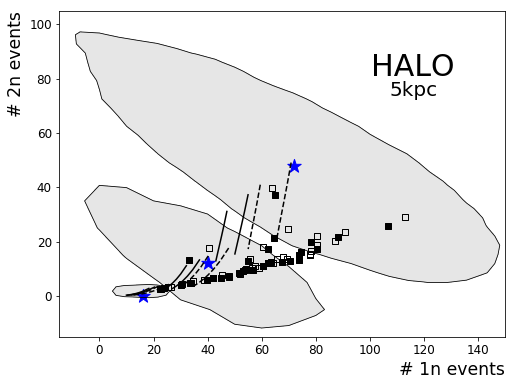

In [15]:
# Figure for HALO 1, 5kpc, 72v48 40vs12 16v0
figM1,axM1 = plt.subplots(1,1,figsize=figsize)

axM1.contourf(xM1_1,yM1_1,zM1_1,levels=[0,cutM1_1,1],colors=[invis,'0.9',invis],zorder=1)
axM1.contour(xM1_1,yM1_1,zM1_1,levels=cutM1_1,colors='black',linewidths=cont_linewidth,zorder=10)

axM1.contourf(xM1_2,yM1_2,zM1_2,levels=[0,cutM1_2,1],colors=[invis,'0.9',invis],zorder=1)
axM1.contour(xM1_2,yM1_2,zM1_2,levels=cutM1_2,colors='black',linewidths=cont_linewidth,zorder=10)

axM1.contourf(xM1_3,yM1_3,zM1_3,levels=[0,cutM1_3,1],colors=[invis,'0.9',invis],zorder=1)
axM1.contour(xM1_3,yM1_3,zM1_3,levels=cutM1_3,colors='black',linewidths=cont_linewidth,zorder=10)

other_sn_models(axM1,1,5,False)
snowglobes_curves(axM1,1,5,False)

# Truth values
Truth = [[72,40,16],[48,12,0]]
axM1.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axM1.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axM1.transAxes)
axM1.text(0.74,0.74,'5kpc',fontsize=dist_size,transform=axM1.transAxes)

# Axes
axM1.set_xlabel('# 1n events',horizontalalignment='right',x=1.0)
axM1.set_ylabel('# 2n events',horizontalalignment='right', y=1.0)


axM1.set_xlim(-15,150)
axM1.set_ylim(-15,105)
plt.show()

In [16]:
# Data for HALO 1, 10kpc, 18v12 10vs3 4v0
h1_10kpc_18v12_1n, h1_10kpc_18v12_2n = np.load(unfolded_location+'halo1_10kpc_18v12_unfolded_matrix.npy')
h1_10kpc_10v3_1n,  h1_10kpc_10v3_2n  = np.load(unfolded_location+'halo1_10kpc_10v3_unfolded_matrix.npy')
h1_10kpc_4v0_1n,   h1_10kpc_4v0_2n   = np.load(unfolded_location+'halo1_10kpc_4v0_unfolded_matrix.npy')

In [17]:
# HALO 1, 10kpc, 18v12
xM2_1,yM2_1,zM2_1,cutM2_1 = contour(h1_10kpc_18v12_1n,h1_10kpc_18v12_2n,-75,100,-15,80,17j,11j,False)

In [18]:
# HALO 1, 10kpc, 10vs3
xM2_2,yM2_2,zM2_2,cutM2_2 = contour(h1_10kpc_10v3_1n,h1_10kpc_10v3_2n,-40,60,-15,50,15j,10,False)

In [19]:
# HALO 1, 10kpc, 4vs0
oneN_,twoN_ = zero_fix(h1_10kpc_4v0_1n,h1_10kpc_4v0_2n)
xM2_3,yM2_3,zM2_3,cutM2_3 = contour(oneN_,twoN_,-5,15,-5,8,8j,13j,False,0)

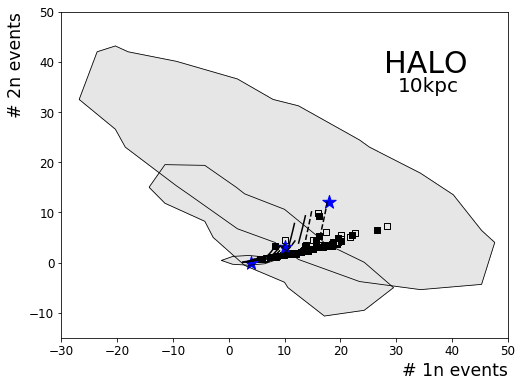

In [20]:
# Figure for HALO 1, 10kpc, 18v12 10vs3 4v0
figM2,axM2 = plt.subplots(1,1,figsize=figsize)

axM2.contourf(xM2_1,yM2_1,zM2_1,levels=[0,cutM2_1,1],colors=[invis,'0.9',invis],zorder=1)
axM2.contour(xM2_1,yM2_1,zM2_1,levels=cutM2_1,colors='black',linewidths=cont_linewidth,zorder=10)

axM2.contourf(xM2_2,yM2_2,zM2_2,levels=[0,cutM2_2,1],colors=[invis,'0.9',invis],zorder=1)
axM2.contour(xM2_2,yM2_2,zM2_2,levels=cutM2_2,colors='black',linewidths=cont_linewidth,zorder=10)

axM2.contourf(xM2_3,yM2_3,zM2_3,levels=[0,cutM2_3,1],colors=[invis,'0.9',invis],zorder=1)
axM2.contour(xM2_3,yM2_3,zM2_3,levels=cutM2_3,colors='black',linewidths=cont_linewidth,zorder=10)

other_sn_models(axM2,1,10,False)
snowglobes_curves(axM2,1,10,False)

# Truth values
Truth = [[18,10,4],[12,3,0]]
axM2.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axM2.text(0.7,0.8,'HALO',fontsize=exp_size,transform=axM1.transAxes)
axM2.text(0.73,0.74,'10kpc',fontsize=dist_size,transform=axM1.transAxes)

# Axes
axM2.set_xlabel('# 1n events',horizontalalignment='right',x=1.0)
axM2.set_ylabel('# 2n events',horizontalalignment='right', y=1.0)


axM2.set_xlim(-30,50)
axM2.set_ylim(-15,50)
plt.show()

In [21]:
# Data for HALO 2, 10kpc, 227v151 127vs38 51v0
h2_10kpc_227v151_1n, h2_10kpc_227v151_2n = np.load(unfolded_location+'halo2_10kpc_227v151_unfolded_matrix.npy')
h2_10kpc_127v38_1n,  h2_10kpc_127v38_2n  = np.load(unfolded_location+'halo2_10kpc_127v38_unfolded_matrix.npy')
h2_10kpc_51v0_1n,    h2_10kpc_51v0_2n    = np.load(unfolded_location+'halo2_10kpc_51v0_unfolded_matrix.npy')

In [22]:
# HALO 2, 10kpc, 227v151
xM3_1,yM3_1,zM3_1,cutM3_1 = contour(h2_10kpc_227v151_1n,h2_10kpc_227v151_2n,-50,500,0,330,50j,50j,False)

In [23]:
# HALO 2, 10kpc, 127vs38
xM3_2,yM3_2,zM3_2,cutM3_2 = contour(h2_10kpc_127v38_1n,h2_10kpc_127v38_2n,-50,300,-20,150,50j,40j,False)

In [24]:
# HALO 2, 10kpc, 51v0
oneN_,twoN_ = zero_fix(h2_10kpc_51v0_1n,h2_10kpc_51v0_2n)
xM3_3,yM3_3,zM3_3,cutM3_3 = contour(oneN_,twoN_,-50,150,-50,80,40j,30j,False,0)

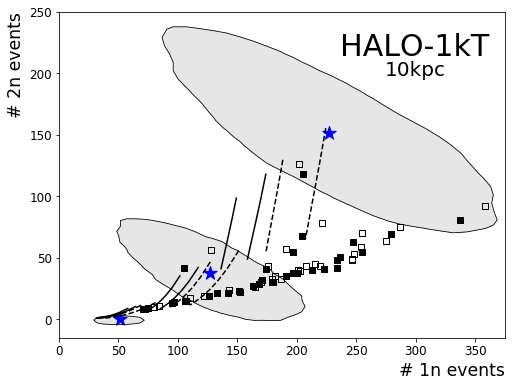

In [25]:
# Figure for HALO 2, 10kpc, 227v151 127vs38 51v0
figM3,axM3 = plt.subplots(1,1,figsize=figsize)

axM3.contourf(xM3_1,yM3_1,zM3_1,levels=[0,cutM3_1,1],colors=[invis,'0.9',invis],zorder=1)
axM3.contour(xM3_1,yM3_1,zM3_1,levels=cutM3_1,colors='black',linewidths=cont_linewidth,zorder=10)

axM3.contourf(xM3_2,yM3_2,zM3_2,levels=[0,cutM3_2,1],colors=[invis,'0.9',invis],zorder=1)
axM3.contour(xM3_2,yM3_2,zM3_2,levels=cutM3_2,colors='black',linewidths=cont_linewidth,zorder=10)

axM3.contourf(xM3_3,yM3_3,zM3_3,levels=[0,cutM3_3,1],colors=[invis,'0.9',invis],zorder=1)
axM3.contour(xM3_3,yM3_3,zM3_3,levels=cutM3_3,colors='black',linewidths=cont_linewidth,zorder=10)

other_sn_models(axM3,2,10,False)
snowglobes_curves(axM3,2,10,False)

# Truth values
Truth = [[227,127,51],[151,38,0]]
axM3.scatter(Truth[0],Truth[1],color='b',marker='*',s=truth_size)

# Title
axM3.text(0.6,0.85,'HALO-1kT',fontsize=exp_size,transform=axM1.transAxes)
axM3.text(0.7,0.79,'10kpc',fontsize=dist_size,transform=axM1.transAxes)

# Axes
axM3.set_xlabel('# 1n events',horizontalalignment='right',x=1.0)
axM3.set_ylabel('# 2n events',horizontalalignment='right', y=1.0)


axM3.set_xlim(0,375)
axM3.set_ylim(-15,250)
plt.show()